<a href="https://colab.research.google.com/github/jyesudian/AnoNetworkData/blob/main/Luflow_XGB_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: Need help in deriving PCA for a dataset. I need sample code. Also, I would like to use the dataset LuFlow which is available in my Google Drive. I think I need to do data engineering on the dataset. Can you give the step by step example and the code accordingly?
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import plot_model
%load_ext tensorboard

In [ ]:
### To check whether GPU is used.
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available and being used.")
    print("GPU Details:", gpu_available)
else:
    print("GPU is not available. Using CPU.")

In [4]:
from IPython.display import Image
import os, datetime

In [5]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [6]:
from google.colab import drive
drive.mount('/content/drive')
# Define the file path to your dataset in Google Drive
#file_path = '/content/drive/MyDrive/LuFlow.csv'
#file_path = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/luflow.csv'


Mounted at /content/drive


In [7]:
file_path_1 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.12.csv'
file_path_2 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.13.csv'
file_path_3 = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/2022.06.14.csv'

In [8]:
# Step 1: Load the dataset from Google Drive
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3)

column_names = df1.columns
print("Column Names df1 / Features:")
print(column_names)

column_names = df2.columns
print("Column Names df2 / Features:")
print(column_names)

column_names = df3.columns
print("Column Names df3 / Features:")
print(column_names)

Column Names df1 / Features:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')
Column Names df2 / Features:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')
Column Names df3 / Features:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'time_end', 'time_start', 'total_entropy', 'label', 'duration'],
      dtype='object')


In [9]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
#     print(df)
#     print(df.info())
    print(df['label'].value_counts())
    print("\n\n\n")

In [10]:
%%time
dataProperties(df1, "DF1")

DF1
Number of rows (Samples):  26167
Number of columns (Features):  16
label
outlier      19719
malicious     3748
benign        2700
Name: count, dtype: int64




CPU times: user 3.58 ms, sys: 0 ns, total: 3.58 ms
Wall time: 8.27 ms


In [11]:
%%time
dataProperties(df2, "DF2")

DF2
Number of rows (Samples):  452123
Number of columns (Features):  16
label
benign       219917
outlier      124966
malicious    107240
Name: count, dtype: int64




CPU times: user 24.4 ms, sys: 0 ns, total: 24.4 ms
Wall time: 23.9 ms


In [12]:
%%time
dataProperties(df3, "DF3")

DF3
Number of rows (Samples):  590086
Number of columns (Features):  16
label
outlier    295493
benign     294593
Name: count, dtype: int64




CPU times: user 29.4 ms, sys: 890 µs, total: 30.3 ms
Wall time: 29.7 ms


In [13]:
dataframes_to_combine = [df1, df2, df3]

# Use pd.concat() to combine the DataFrames row-wise
# The default behavior of concat is to combine along rows (axis=0)
df = pd.concat(dataframes_to_combine, ignore_index=True)

#Display the first few rows of the combined DataFrame to verify
print("First 5 rows of the combined DataFrame:")
print(df.head())

#Check the shape of the combined DataFrame
print("\nShape of the combined DataFrame:")
print(df.shape)

First 5 rows of the combined DataFrame:
   avg_ipt  bytes_in  bytes_out  dest_ip  dest_port  entropy  num_pkts_out  \
0      0.0         0          0      786    31306.0      0.0             1   
1      0.0         0          0      786    24298.0      0.0             1   
2      0.0         0          0      786    31789.0      0.0             1   
3      0.0         0          0      786    29409.0      0.0             1   
4      0.0         0          0      786    60965.0      0.0             1   

   num_pkts_in  proto  src_ip  src_port          time_end        time_start  \
0            0      6     786   47613.0  1655074782132491  1655074782132491   
1            0      6     786   47613.0  1655074782573321  1655074782573321   
2            0      6     786   47613.0  1655074783148517  1655074783148517   
3            0      6     786   47613.0  1655074783149855  1655074783149855   
4            0      6     786   47613.0  1655074783167254  1655074783167254   

   total_entropy

Convert your epoch time to datetime objects and engineer relevant temporal features like hour of the day, day of the week, and flow duration. These engineered features are much more informative and suitable as input for ML and ANN algorithms than the raw epoch timestamps.

In our dataset, we have the epoch time in micro sec, so unit=us is used.

In [14]:
df['time_start_dt'] = pd.to_datetime(df['time_start'], unit='us', errors='coerce')
df['time_end_dt'] = pd.to_datetime(df['time_end'], unit='us', errors='coerce')
# Extract components of the start time
df['start_hour_of_day'] = df['time_start_dt'].dt.hour
df['start_day_of_week'] = df['time_start_dt'].dt.dayofweek # Monday=0, Sunday=6
df['start_minute_of_hour'] = df['time_start_dt'].dt.minute
#Display the first few rows of the combined DataFrame to verify
print("First 5 rows of the combined DataFrame:")
print(df.head())

#Check the shape of the combined DataFrame
print("\nShape of the combined DataFrame:")
print(df.shape)

First 5 rows of the combined DataFrame:
   avg_ipt  bytes_in  bytes_out  dest_ip  dest_port  entropy  num_pkts_out  \
0      0.0         0          0      786    31306.0      0.0             1   
1      0.0         0          0      786    24298.0      0.0             1   
2      0.0         0          0      786    31789.0      0.0             1   
3      0.0         0          0      786    29409.0      0.0             1   
4      0.0         0          0      786    60965.0      0.0             1   

   num_pkts_in  proto  src_ip  ...          time_end        time_start  \
0            0      6     786  ...  1655074782132491  1655074782132491   
1            0      6     786  ...  1655074782573321  1655074782573321   
2            0      6     786  ...  1655074783148517  1655074783148517   
3            0      6     786  ...  1655074783149855  1655074783149855   
4            0      6     786  ...  1655074783167254  1655074783167254   

   total_entropy    label duration            

In [15]:
# You can drop the original 'time_start' and 'time_end' columns
df = df.drop(columns=['time_start', 'time_end'])

We can see whether keeping entropy makes the algorithm any better. So, we shall have two type of datasets. One with the entropies and the other with out the same.

In [16]:
# Identify the entropy columns. You'll need to know their exact names.
# Let's assume your entropy columns are named 'entropy' and 'total_entropy'
entropy_columns = ['entropy', 'total_entropy'] # Replace with actual column names

# Create a copy of the cleaned DataFrame that will include the entropy columns
df_with_entropies = df.copy()

# Create another copy of the cleaned DataFrame that you will modify
df_without_entropies = df.copy()

# Drop the entropy columns from the 'df_without_entropies' DataFrame
# Use errors='ignore' in case some columns were not found (though they should be if named correctly)
df_without_entropies = df_without_entropies.drop(columns=entropy_columns, errors='ignore')

# Verify the column names in both DataFrames
print("Columns in df_with_entropies:")
print(df_with_entropies.columns)

print("\nColumns in df_without_entropies:")
print(df_without_entropies.columns)

Columns in df_with_entropies:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port',
       'total_entropy', 'label', 'duration', 'time_start_dt', 'time_end_dt',
       'start_hour_of_day', 'start_day_of_week', 'start_minute_of_hour'],
      dtype='object')

Columns in df_without_entropies:
Index(['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port',
       'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port', 'label',
       'duration', 'time_start_dt', 'time_end_dt', 'start_hour_of_day',
       'start_day_of_week', 'start_minute_of_hour'],
      dtype='object')


**Store these datasets in Google Drive as they can be used as starting point few use cases.**

In [ ]:
entropy_file_path_in_drive = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/WithEntropies.csv'
noentropy_file_path_in_drive = '/content/drive/MyDrive/VIT/Dataset/LuFlow2021/WithOutEntropies.csv'

df_with_entropies.to_csv(entropy_file_path_in_drive, index=False)
df_without_entropies.to_csv(noentropy_file_path_in_drive, index=False)

print(f"DataFrame successfully saved to: {entropy_file_path_in_drive}, {noentropy_file_path_in_drive}")


In [17]:
def dropInfNull(df):
    print (df.shape)

    # replace infinity value as null value
    df = df.replace(["Infinity", "infinity"], np.inf)
    df = df.replace([np.inf, -np.inf], np.nan)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

**Now Proceed With Entropies as the Entropy calculation is done by the Luflow dataset providers itself.**

In [18]:
%%time
network_data_d1 = dropInfNull(df_with_entropies)

(1068376, 19)
(964168, 19)
CPU times: user 291 ms, sys: 41.1 ms, total: 332 ms
Wall time: 331 ms


In [19]:
#Get the unique labels
unique_labels = network_data_d1['label'].unique()

#Get the counts of each unique label
label_counts = network_data_d1['label'].value_counts()

#Print the results

print("Unique Labels:")
print(unique_labels)

print("\nCounts of Each Label:")
print(label_counts)

Unique Labels:
['outlier' 'benign' 'malicious']

Counts of Each Label:
label
benign       517209
outlier      368843
malicious     78116
Name: count, dtype: int64


In an anomaly detection context, "outlier" often signifies something unusual or potentially suspicious, even if it doesn't fit a known malicious signature. Grouping "malicious" and "outlier" together allows your model to learn to distinguish between "normal" traffic and any form of unusual or potentially harmful traffic captured in these two categories.

In [20]:
network_data_d1['binary_label'] = network_data_d1['label'].apply(lambda x: 0 if x == 'benign' else 1)

## After converting the binary_label, we can drop the label column from the dataset
del_columns = ['label']

network_data_d1 = network_data_d1.drop(columns=del_columns, errors='ignore')

In [21]:
#Get the counts of each unique label
label_counts = network_data_d1['binary_label'].value_counts()
print("\nCounts of Each Label:")
print(label_counts)


Counts of Each Label:
binary_label
0    517209
1    446959
Name: count, dtype: int64


**with 517,209 benign data points and 446,959 malignant data points, this dataset for binary classification is considered moderately imbalanced. As this dataset is considered large enough, it is fine to have 'Random Undersampling". **

In [22]:
# Separate the DataFrame into benign and non-benign instances
df_benign = network_data_d1[network_data_d1['binary_label'] == 0]
df_non_benign = network_data_d1[network_data_d1['binary_label'] == 1]

# Step 2: Determine the number of benign instances to remove
num_benign_to_remove = 70250
num_benign_to_keep = len(df_benign) - num_benign_to_remove

# Use the sample method to randomly select instances to keep
df_benign_undersampled = df_benign.sample(n=num_benign_to_keep, random_state=42) # Use a random_state for reproducibility

# Step 4: Combine the undersampled benign DataFrame with the non-benign DataFrame
df_balanced = pd.concat([df_benign_undersampled, df_non_benign], ignore_index=True)

# Optional: Verify the class distribution in the new DataFrame
print("Class distribution after undersampling:")
print(df_balanced['binary_label'].value_counts())

# Optional: Shuffle the DataFrame to mix the instances (good practice before training)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


Class distribution after undersampling:
binary_label
0    446959
1    446959
Name: count, dtype: int64


**Understanding the Data Type of the Dataset**

In [23]:
# Access the dtypes attribute
feature_data_types = df_balanced.dtypes

# Print the data types
print("Data Types of Features:")
print(feature_data_types)

Data Types of Features:
avg_ipt                        float64
bytes_in                         int64
bytes_out                        int64
dest_ip                          int64
dest_port                      float64
entropy                        float64
num_pkts_out                     int64
num_pkts_in                      int64
proto                            int64
src_ip                           int64
src_port                       float64
total_entropy                  float64
duration                       float64
time_start_dt           datetime64[ns]
time_end_dt             datetime64[ns]
start_hour_of_day                int32
start_day_of_week                int32
start_minute_of_hour             int32
binary_label                     int64
dtype: object


**Raw datetime64[ns] objects cannot be directly used as input features for most standard ML/ANN algorithms. These algorithms expect numerical inputs. As the temporal values such as start_hour_of_day, start_day_of_week and start_minute_of_hour is captured with in dataset, those date time format columns can be removed.**

In [24]:
df_balanced = df_balanced.drop(columns=['time_start_dt', 'time_end_dt'])

**Drop Constant Column**

In [25]:
%%time
# drop the constant columns (which varience is 0)
variances = df_balanced.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df_balanced = df_balanced.drop(constant_columns, axis=1)

print(constant_columns)
print (df_balanced.shape)

Index([], dtype='object')
(893918, 17)
CPU times: user 44.5 ms, sys: 7.87 ms, total: 52.3 ms
Wall time: 51.3 ms


**Drop Duplicate Column**

In [26]:
duplicates = set()
for i in range(0, len(df_balanced.columns)):
    col1 = df_balanced.columns[i]
    for j in range(i+1, len(df_balanced.columns)):
        col2 = df_balanced.columns[j]
        if(df_balanced[col1].equals(df_balanced[col2])):
            duplicates.add(col2)

print (duplicates)
df_balanced.drop(duplicates, axis=1, inplace=True)
print (df_balanced.shape)

{'src_ip'}
(893918, 16)


**Drop Columns based on correlation**

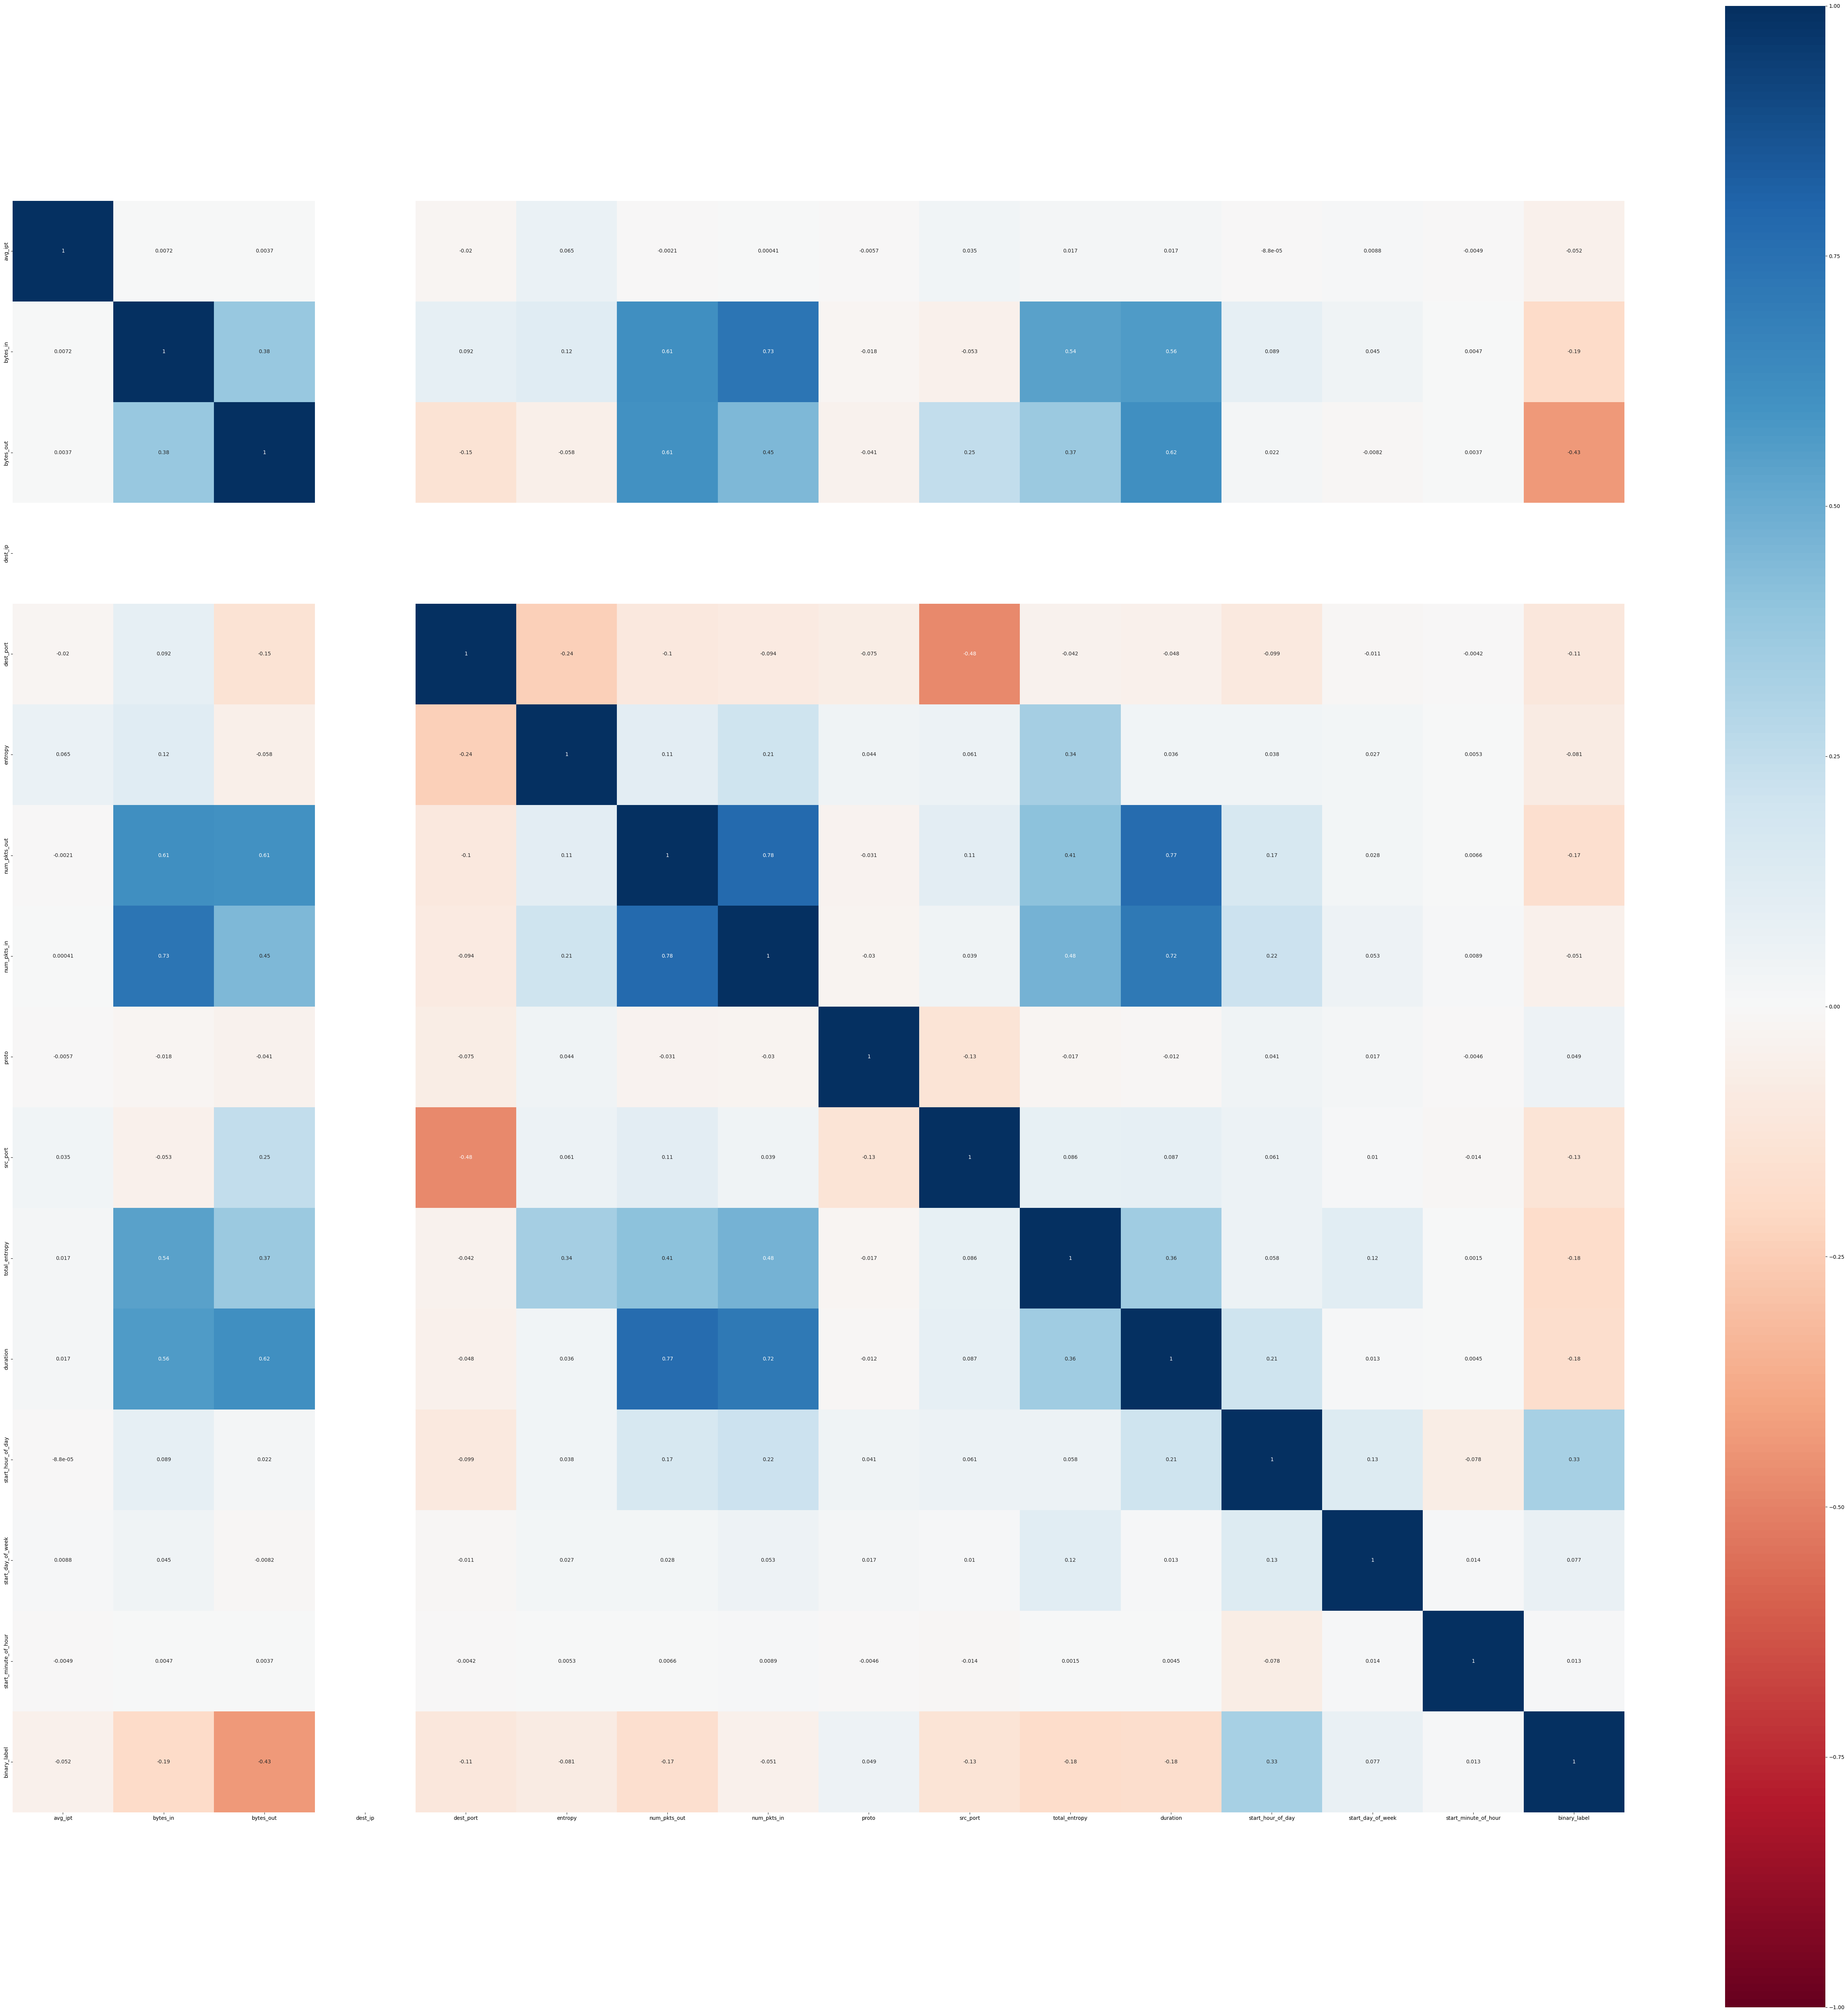

CPU times: user 1.89 s, sys: 93.9 ms, total: 1.98 s
Wall time: 2 s


In [27]:
%%time
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df_balanced.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [28]:
%%time
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

set()
0
CPU times: user 1.93 ms, sys: 0 ns, total: 1.93 ms
Wall time: 1.95 ms


In [29]:
%%time
df_balanced.drop(correlated_col, axis=1, inplace=True)
print (df_balanced.shape)

(893918, 16)
CPU times: user 11 ms, sys: 9.02 ms, total: 20 ms
Wall time: 19 ms


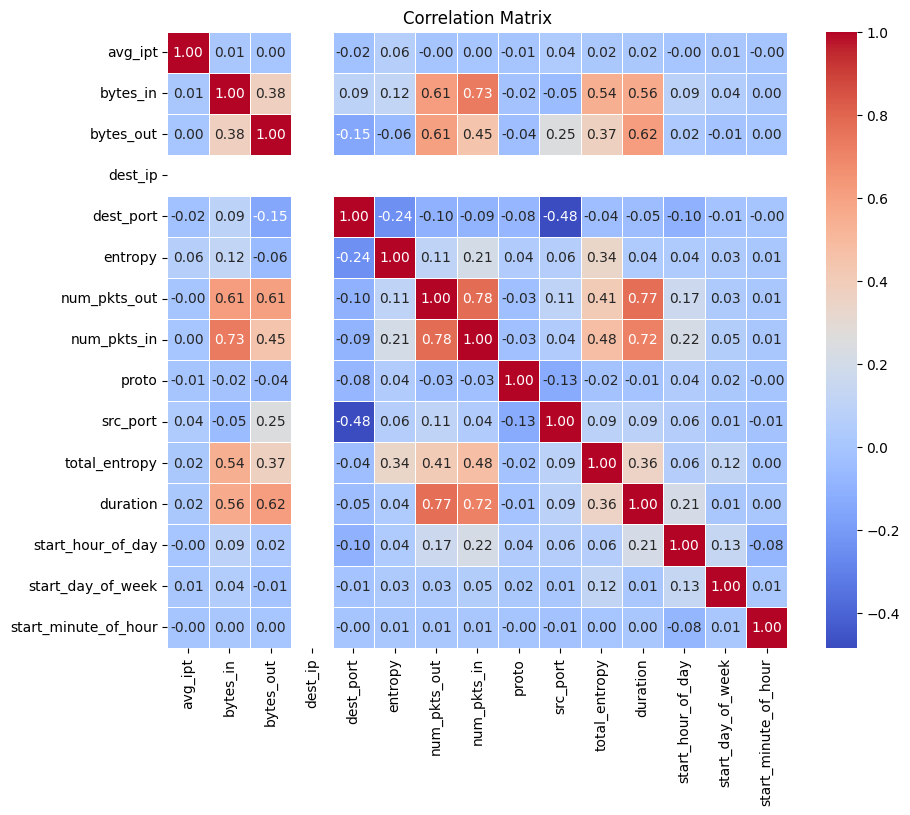

In [30]:
# Calculate correlation matrix
correlation_matrix = df_balanced.drop('binary_label', axis=1).corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

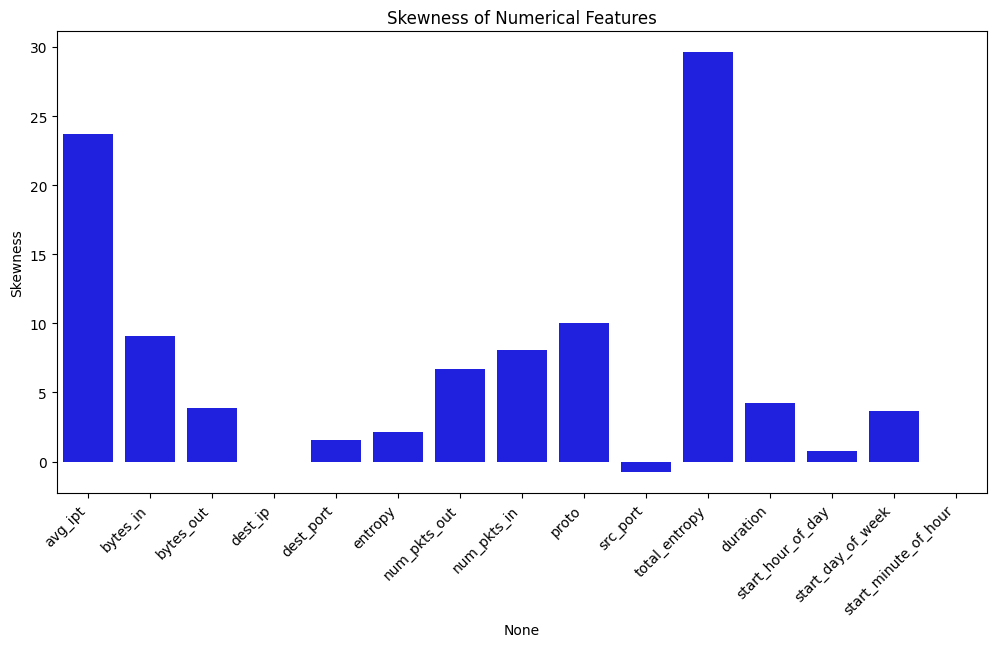

In [31]:
# Calculate skewness for each numerical column
skewness = df_balanced.drop('binary_label', axis=1).skew()

# Create a bar plot or a histogram of skewness values
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Skewness of Numerical Features')
plt.ylabel('Skewness')
plt.show()

In [32]:
%%time
X=df_balanced.drop(["binary_label"], axis=1)
y=df_balanced["binary_label"]

# split the data for evaluation
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

CPU times: user 105 ms, sys: 10 ms, total: 115 ms
Wall time: 114 ms


In [33]:
x_train

avg_ipt  bytes_in  bytes_out  dest_ip  dest_port   entropy  \
397025    0.000000         0          0      786     5900.0  0.000000   
470383   32.571429        34         29      786     5900.0  5.052442   
583847  428.982143      2521      63486      786     9200.0  0.952980   
730189    0.000000         0          0      786    45318.0  0.000000   
41688   778.250000        42        596      786     9300.0  5.777049   
...            ...       ...        ...      ...        ...       ...   
259178    0.000000         0          0      786     5900.0  0.000000   
365838    0.000000         0          0      786    36644.0  0.000000   
131932    0.000000         0          0      786    45332.0  0.000000   
671155   90.500000        12         12      786     5900.0  2.918296   
121958    0.000000         0          0      786    47232.0  0.000000   

        num_pkts_out  num_pkts_in  proto  src_port  total_entropy   duration  \
397025             1            0      6   22661.0        0.00000   0.000000   
470383             7           10      6   32061.0      318.30383   0.379568   
583847            56           17      6   54322.0    62903.33200  24.031807   
730189             1            0      6    9200.0        0.00000   0.000000   
41688              4            2      6   44012.0     3685.75730   3.113894   
...              ...          ...    ...       ...            ...        ...   
259178             1            0      6   46311.0        0.00000   0.000000   
365838             1            0      6    5900.0        0.00000   0.000000   
131932             1            0      6    9200.0        0.00000   0.000000   
671155             3            1      6   27819.0       70.03911   0.181952   
121958             2            0      6    9200.0        0.00000   0.000000   

        start_hour_of_day  start_day_of_week  start_minute_of_hour  
397025                  4                  1                     1  
470383                 18                  1                    29  
583847                 16                  0                    39  
730189                  2                  0                    55  
41688                  12                  0                    14  
...                   ...                ...                   ...  
259178                  3                  1                    12  
365838                  5                  1                    44  
131932                  2                  0                    56  
671155                  4                  1                     0  
121958                  5                  1                    11  

[715134 rows x 15 columns]

In [34]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training set
x_train = scaler.fit_transform(x_train)

# Transform the testing set using the same scaler
x_test = scaler.transform(x_test)

In [35]:
# Random Forest with GridSearchCV
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_best_model = rf_grid.best_estimator_

In [44]:
print("\nBest Estimator's Hyperparameters:")
print(rf_best_model.get_params())


Best Estimator's Hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [39]:
# XGBoost with GridSearchCV
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_best_model = xgb_grid.best_estimator_

In [45]:
print("\nBest Estimator's Hyperparameters:")
print(xgb_best_model.get_params())


Best Estimator's Hyperparameters:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


# **Calculate the Metrics for Random Forest**

In [36]:
# Make predictions on the test set using the best Random Forest model
y_pred_rf = rf_best_model.predict(x_test)
y_proba_rf = rf_best_model.predict_proba(x_test)[:, 1] # Get probabilities for the positive class (class 1)

In [37]:
# Calculate and print the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Confusion Matrix for Random Forest:
[[89256    22]
 [   13 89493]]



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89278
           1       1.00      1.00      1.00     89506

    accuracy                           1.00    178784
   macro avg       1.00      1.00      1.00    178784
weighted avg       1.00      1.00      1.00    178784



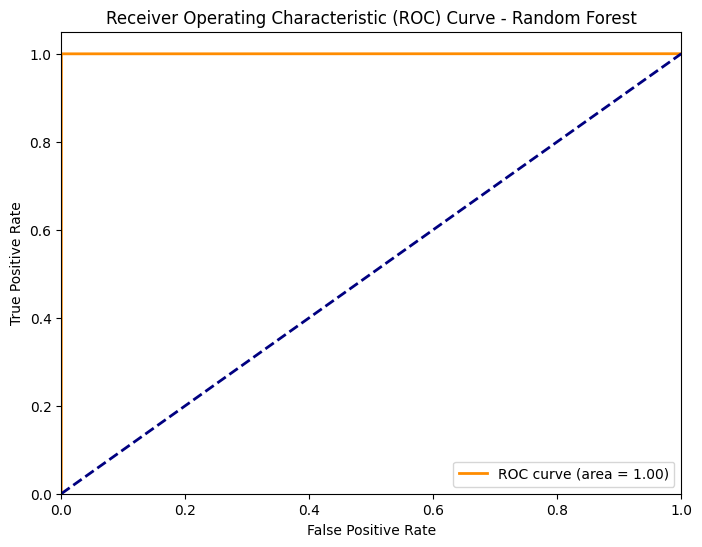

In [38]:
# Calculate and print the classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest:")
print(class_report_rf)

# Calculate the ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# **Calculate the Metrics for XGBoost**

In [40]:
# Make predictions on the test set using the best Random Forest model
y_pred_xgb = xgb_best_model.predict(x_test)
y_proba_xgb = xgb_best_model.predict_proba(x_test)[:, 1] # Get probabilities for the positive class (class 1)

In [41]:
# Calculate and print the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(conf_matrix_xgb)

Confusion Matrix for XGBoost:
[[89262    16]
 [   17 89489]]



Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89278
           1       1.00      1.00      1.00     89506

    accuracy                           1.00    178784
   macro avg       1.00      1.00      1.00    178784
weighted avg       1.00      1.00      1.00    178784



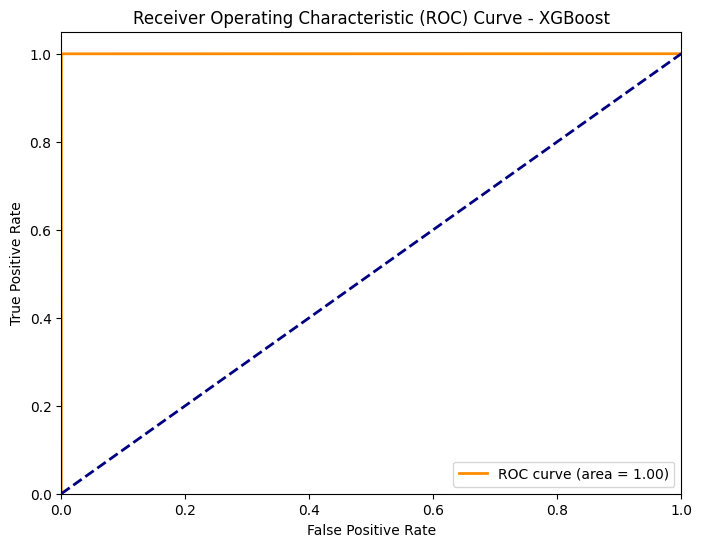

In [42]:
# Calculate and print the classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report for XGBoost:")
print(class_report_xgb)

# Calculate the ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()